
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**: 4.5-5 без учета ошибок и не уверен по поводу последнего задания

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

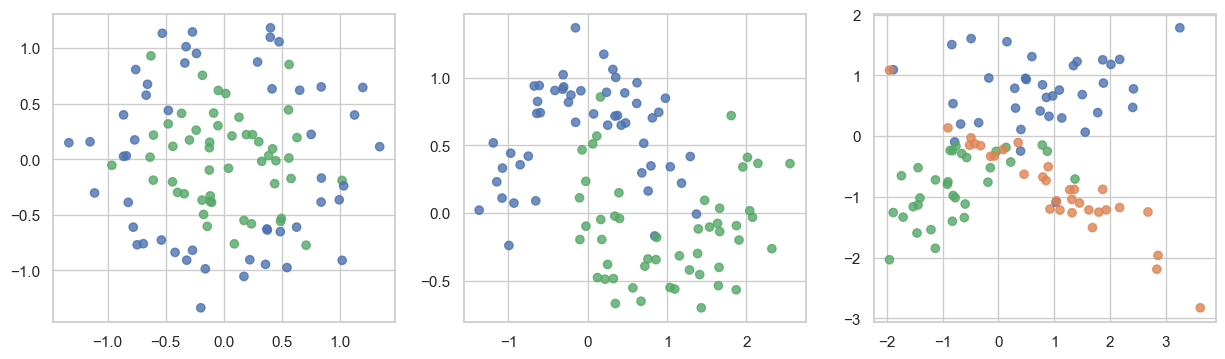

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y, ax=None):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    if ax is None:
        ax = plt.gca()

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

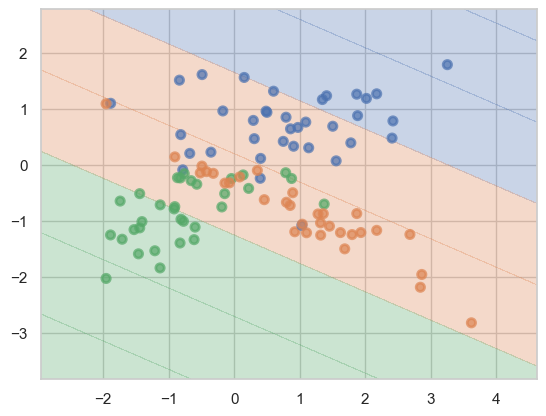

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

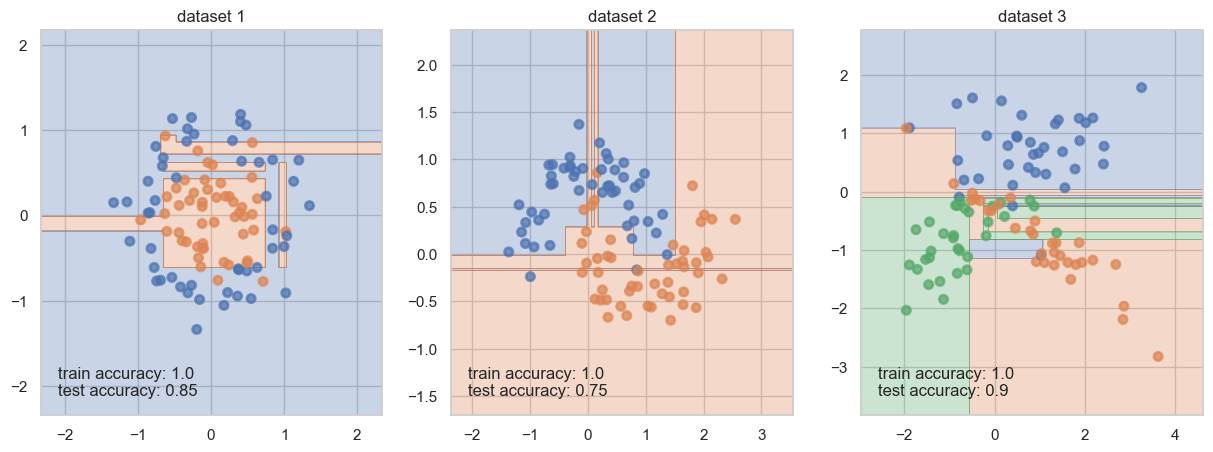

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
for i in range(len(datasets)):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

    cls = DecisionTreeClassifier()
    cls.fit(X_train, y_train)
    
    y_pred = cls.predict(X_test)
    accuracy = {}
    accuracy['train'] = accuracy_score(y_train, y_train)
    accuracy['test'] = accuracy_score(y_test, y_pred)
    text = f'train accuracy: {accuracy['train']}\ntest accuracy: {accuracy['test']}'
    
    plot_surface(cls, X, y, ax[i])
    ax[i].set_title(f'dataset {i + 1}')
    ax[i].text(0.05, 0.05, text, fontsize=12, transform=ax[i].transAxes)

plt.show()  

__Ответ:__ Однозначно для всех 3х датасетов имеет место быть переобучение

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

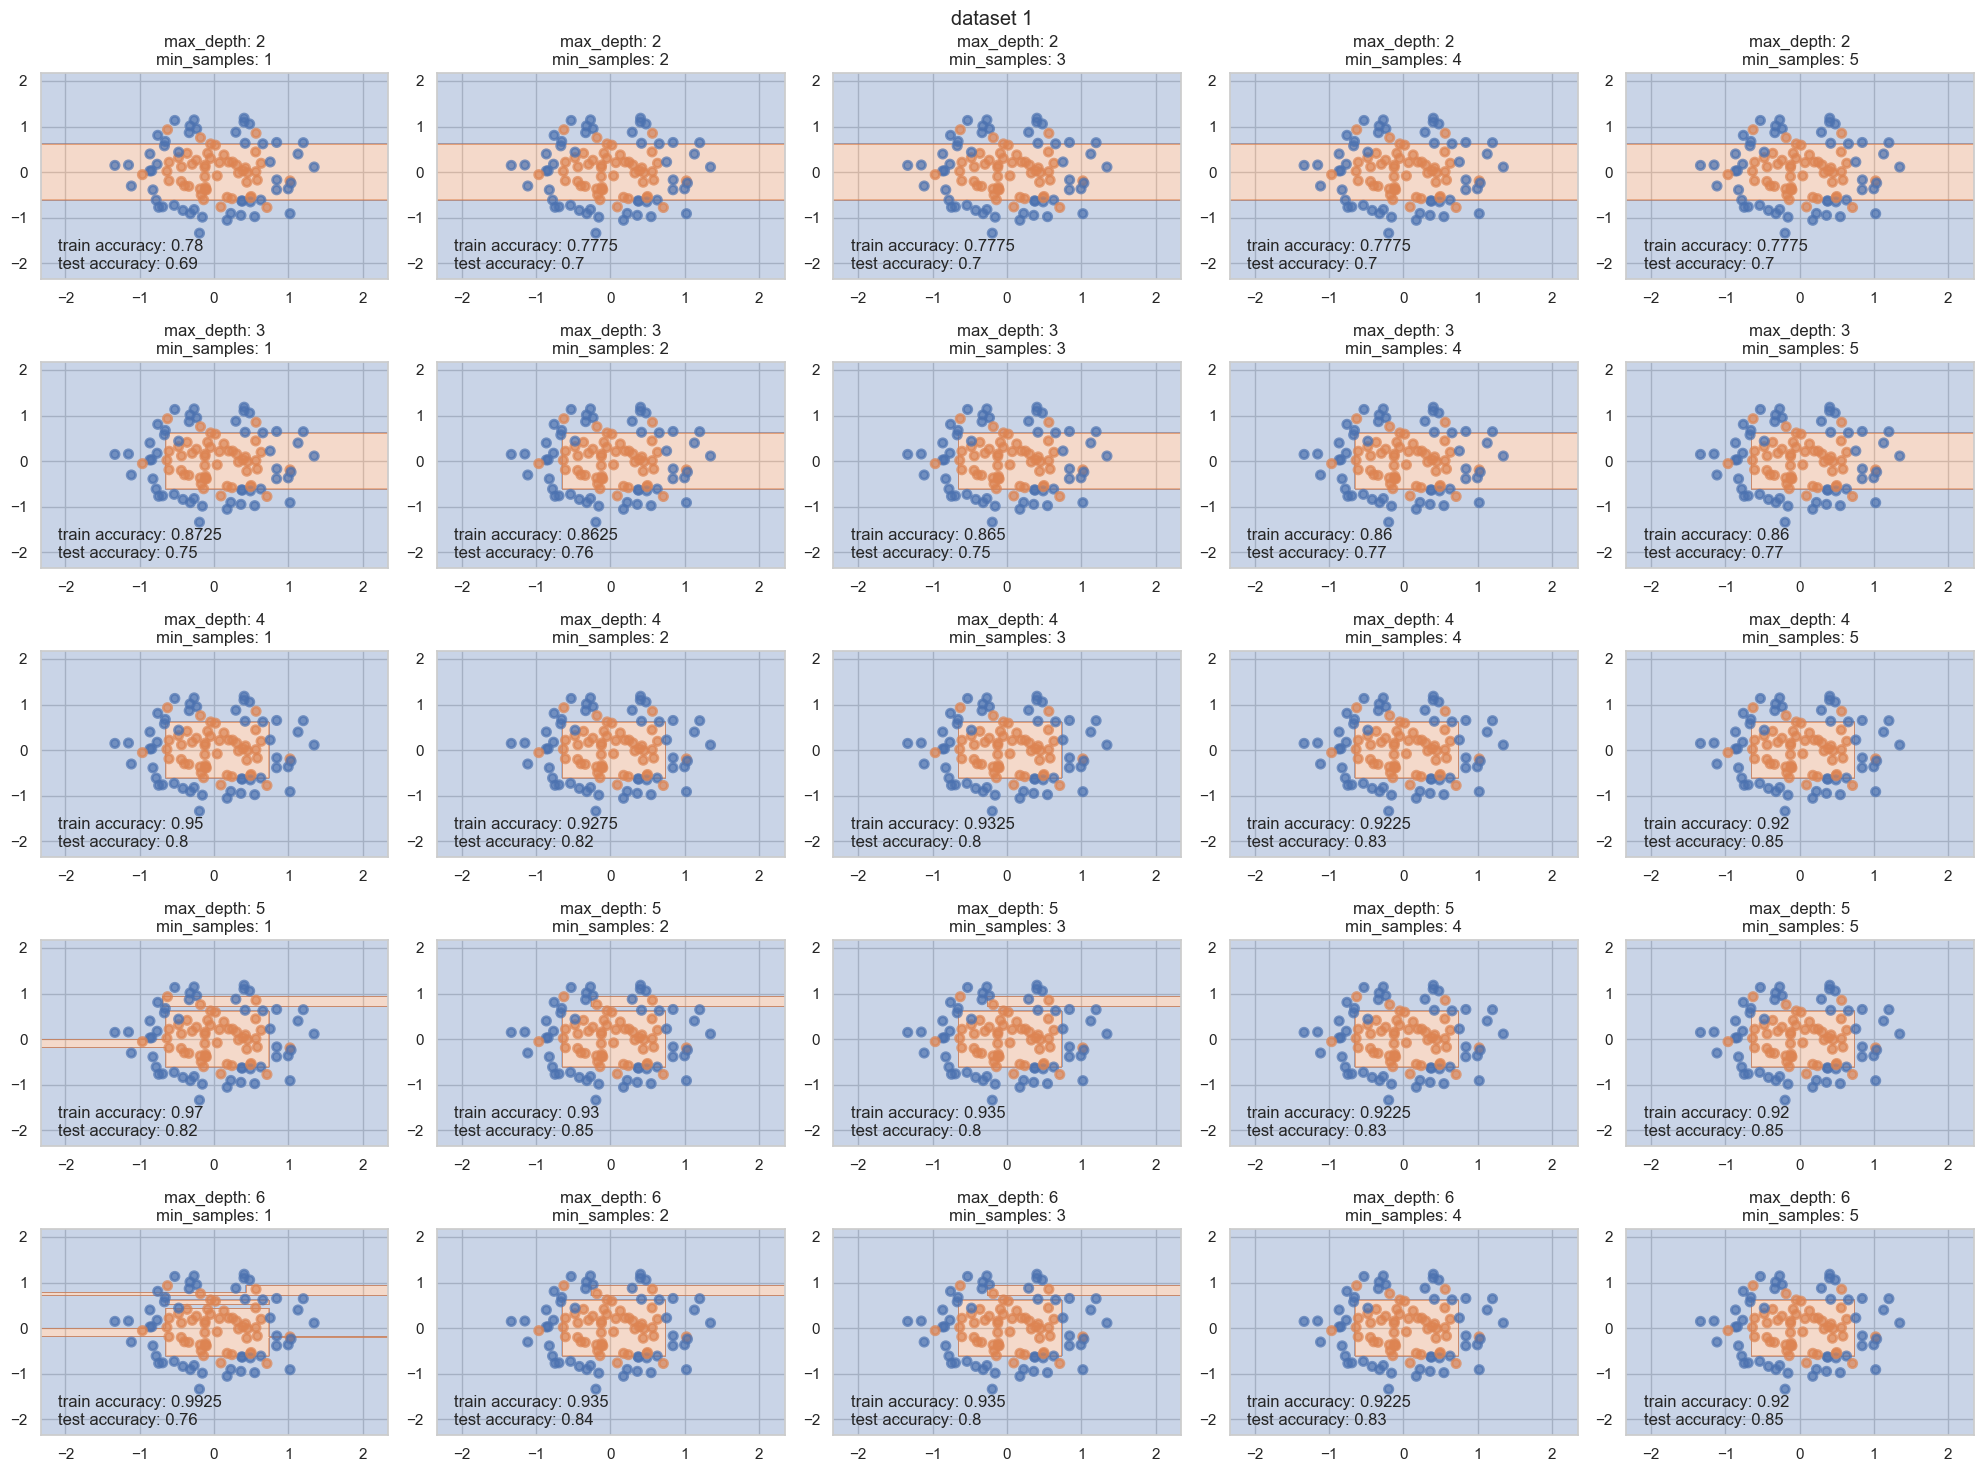

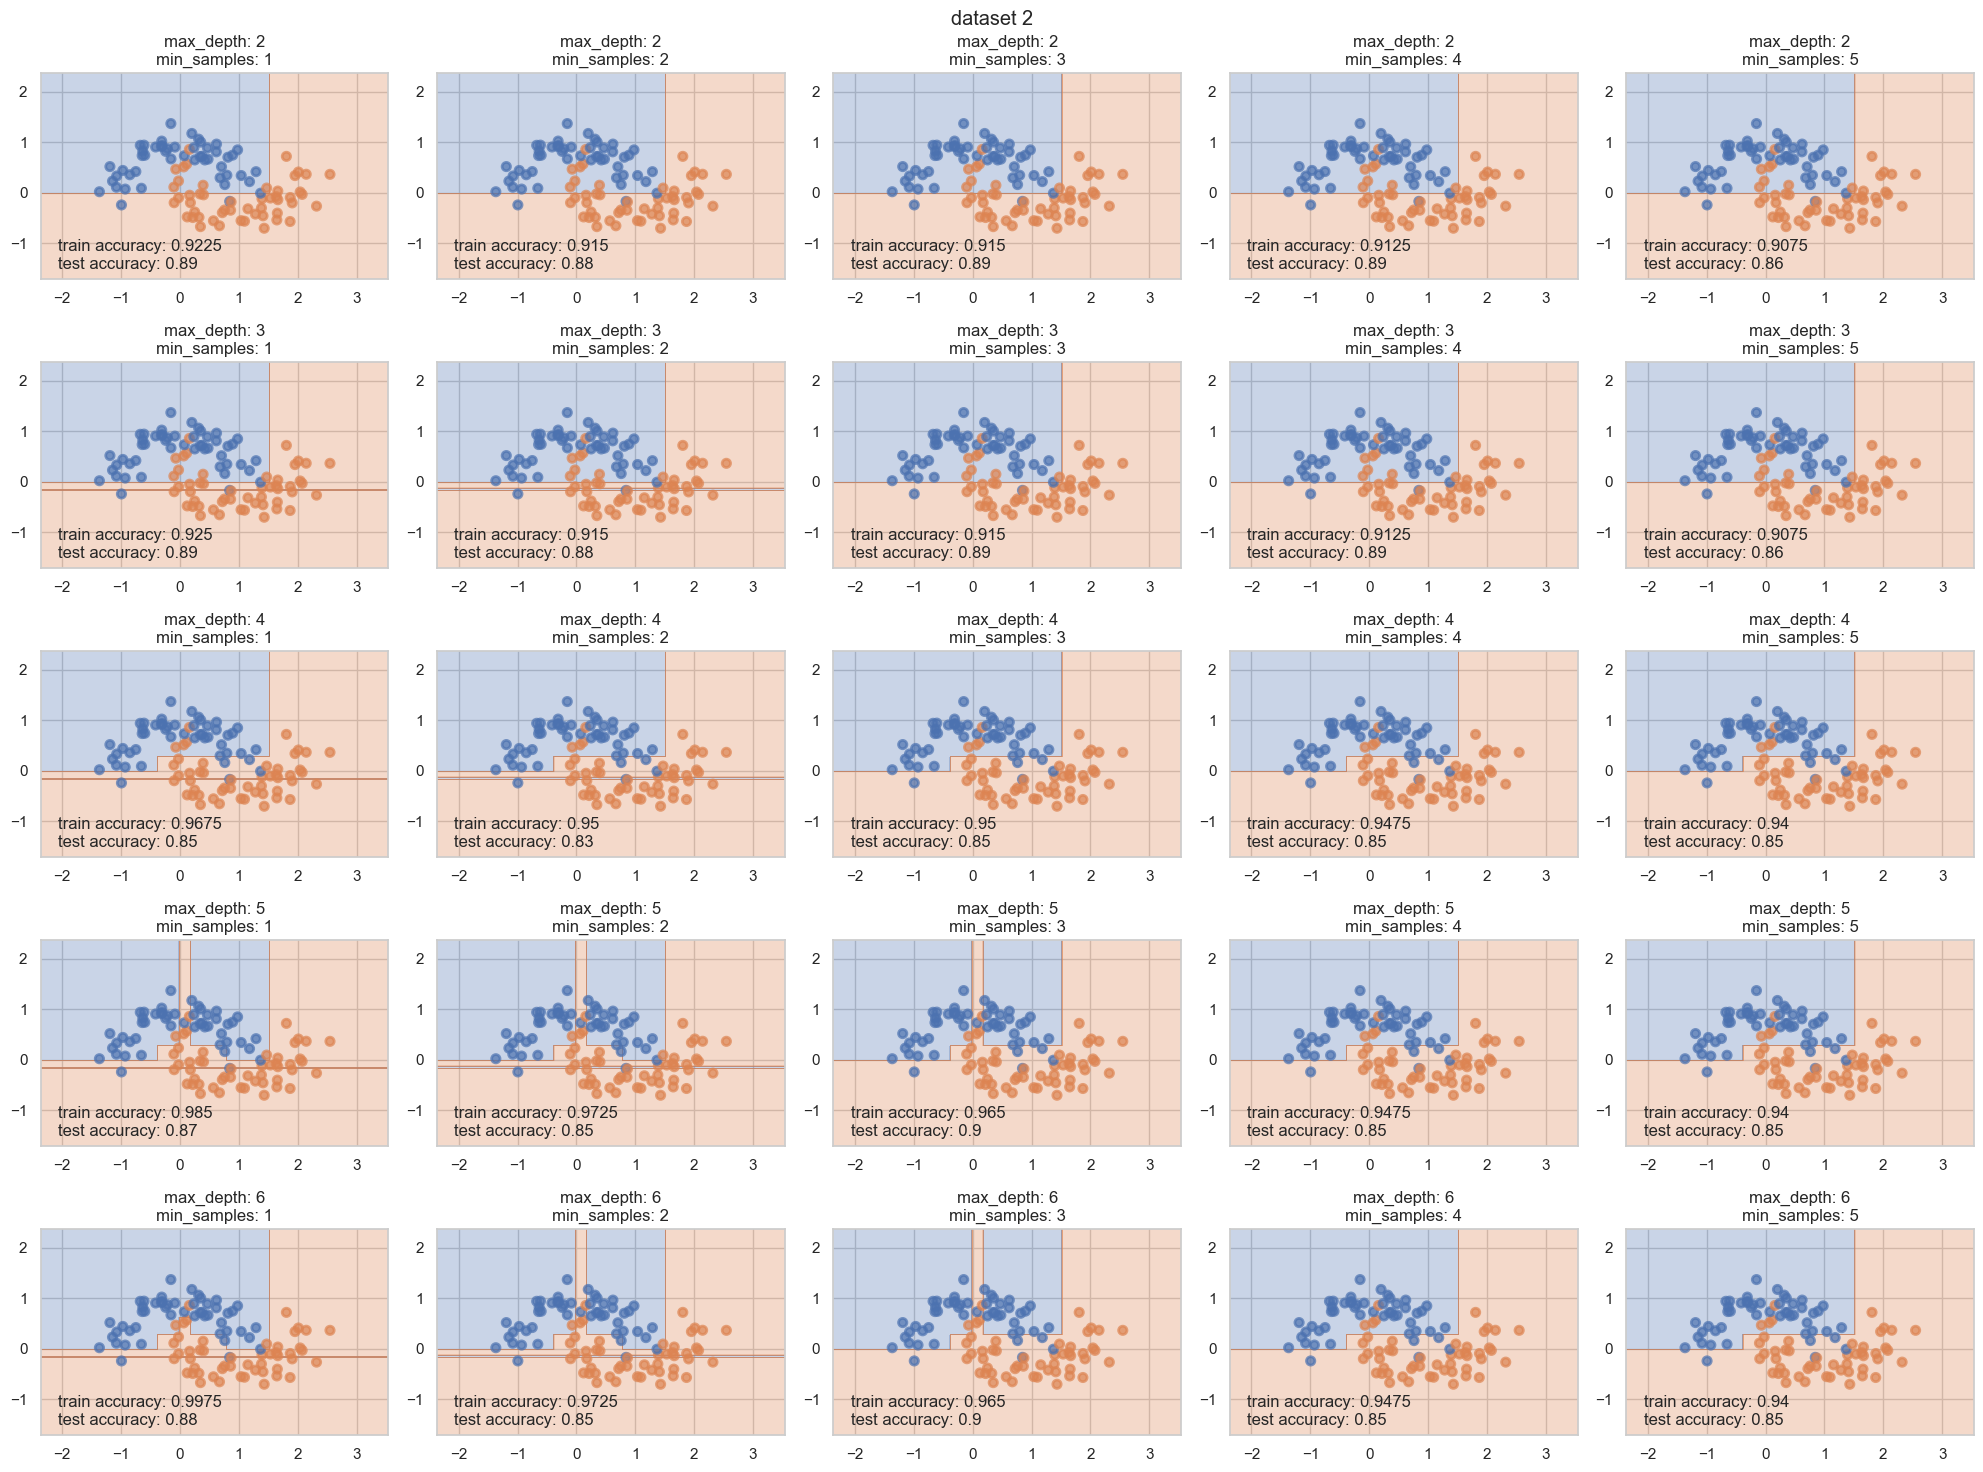

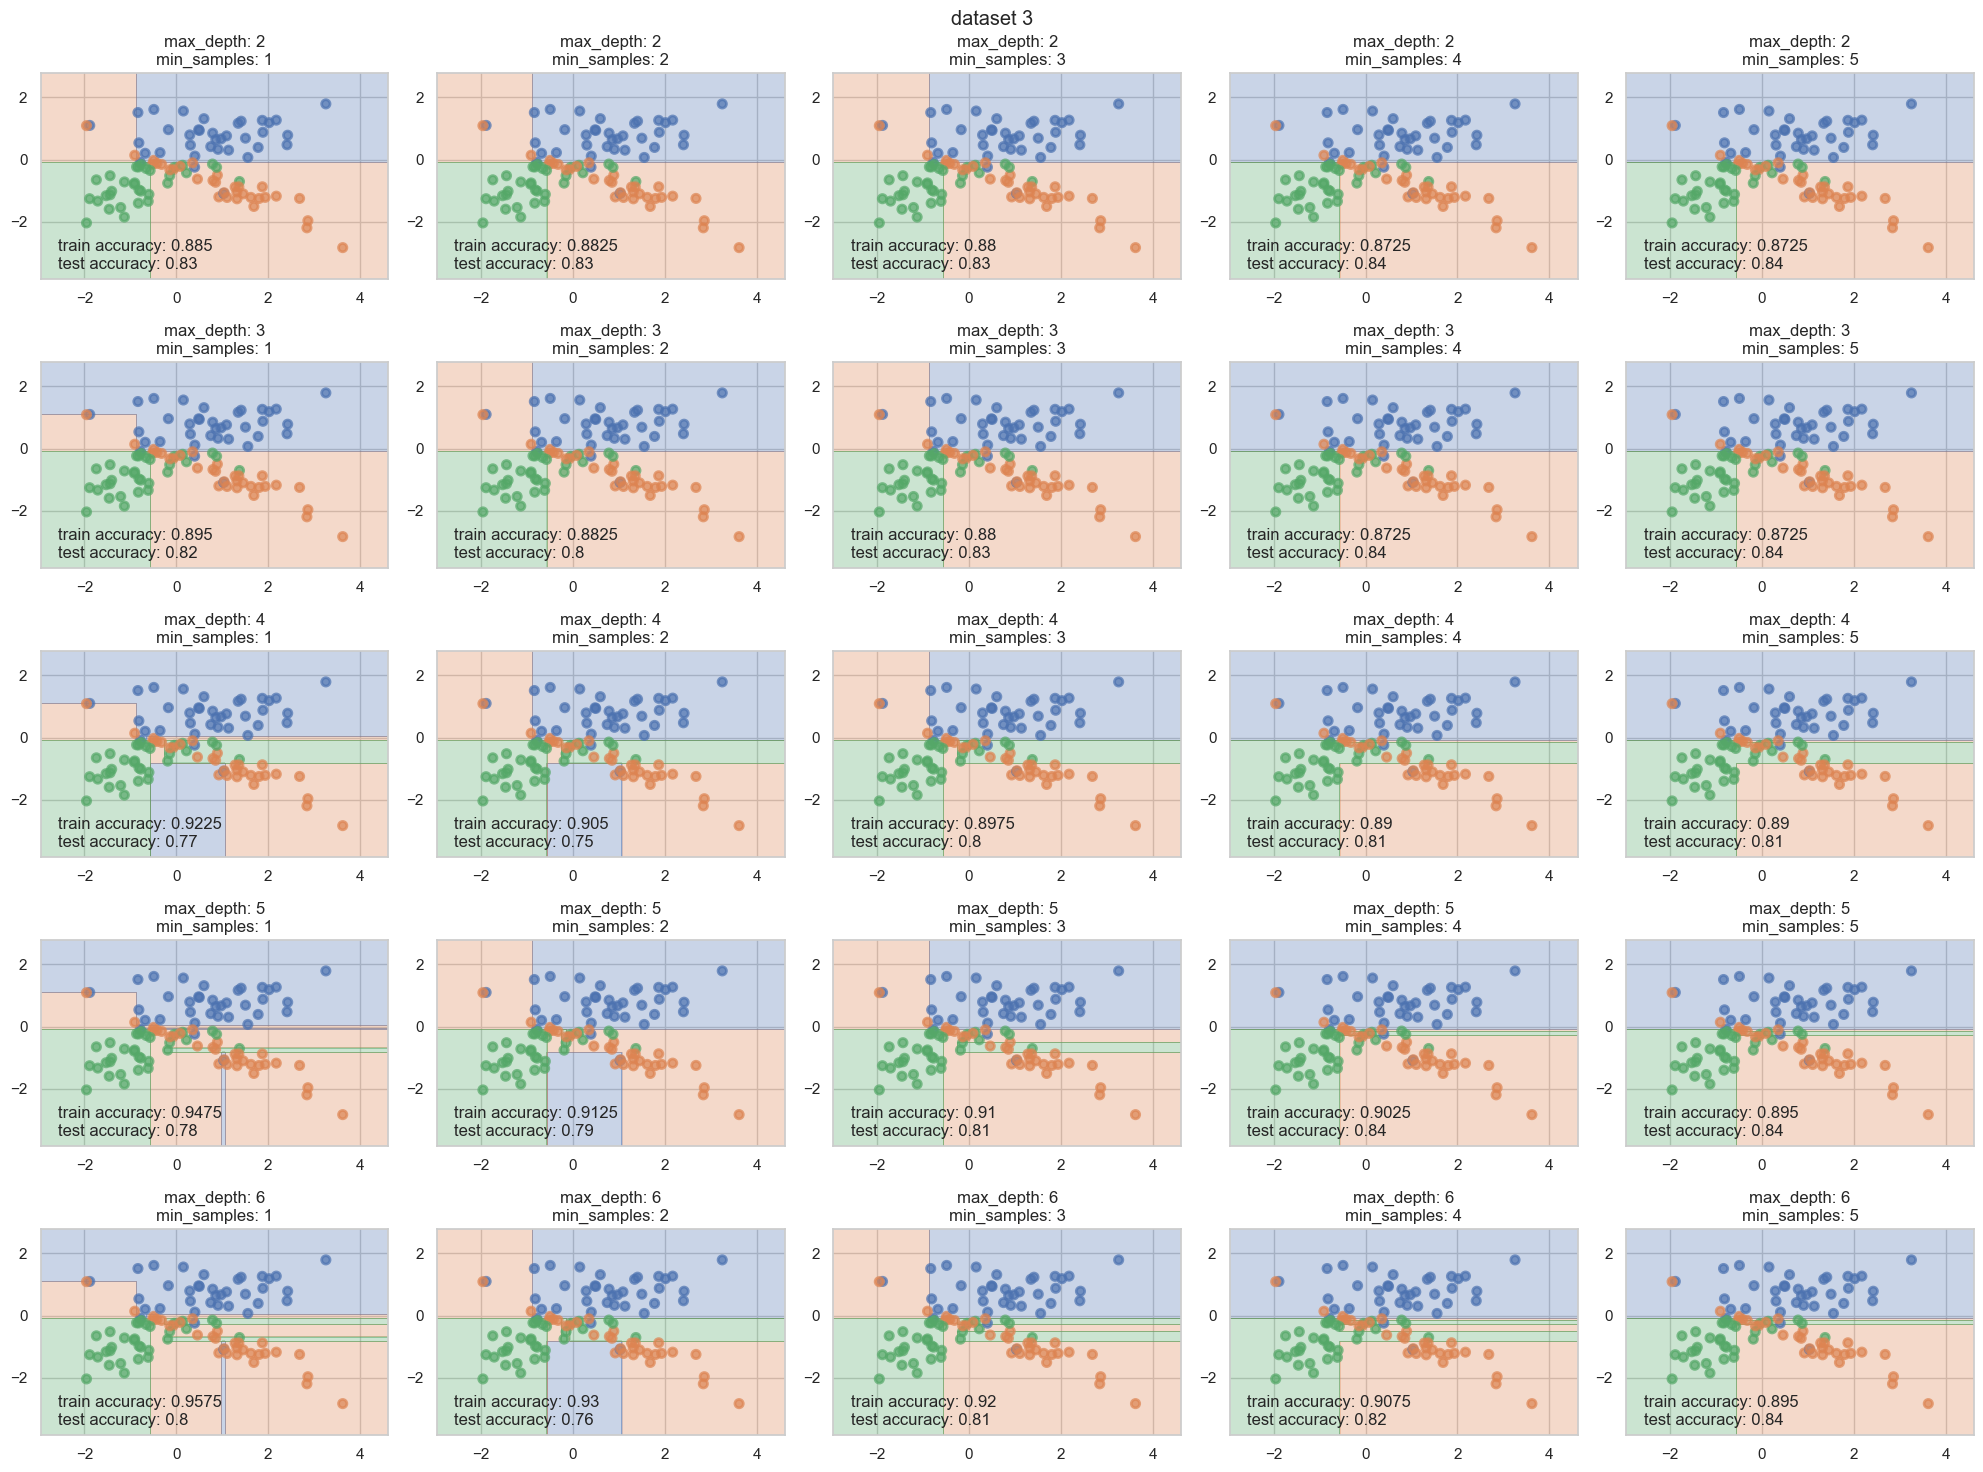

In [38]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer

max_depth_values = np.arange(2, 7)
min_samples_leaf_values = np.arange(1, 6)

metrics = pd.DataFrame(columns=['dataset', 'max_depth', 'min_samples_leaf', 'train accuracy', 'test accuracy'])

for k in range(len(datasets)):

    fig, ax = plt.subplots(nrows=max_depth_values.size, ncols=min_samples_leaf_values.size, figsize=(20, 15))

    X, y = datasets[k]
    kf = KFold(n_splits=5, random_state=777, shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

    for i, max_depth in enumerate(max_depth_values):
    
        for j, min_samples_leaf in enumerate(min_samples_leaf_values):  
    
            cls = DecisionTreeClassifier(random_state=777, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

            result = cross_validate(estimator=cls, X=X, y=y, cv=kf, scoring='accuracy', return_train_score=True)
            accuracy = {'train': result['train_score'].mean().round(4), 'test': result['test_score'].mean().round(4)}
            
            cls.fit(X_train, y_train)
            plot_surface(cls, X, y, ax[i, j])
            ax[i, j].set_title(f'max_depth: {max_depth}\nmin_samples: {min_samples_leaf}')
            text = f'train accuracy: {accuracy['train']}\ntest accuracy: {accuracy['test']}'
            ax[i, j].text(0.05, 0.05, text, fontsize=12, transform=ax[i, j].transAxes)

            metrics.loc[metrics.shape[0]] = [k, max_depth, min_samples_leaf, accuracy['train'], accuracy['test']]

    plt.suptitle(f'dataset {k + 1}')
    plt.tight_layout()
    plt.show()

metrics[['dataset', 'max_depth', 'min_samples_leaf']] = metrics[['dataset', 'max_depth', 'min_samples_leaf']].astype(int)


In [41]:
best = metrics.loc[metrics.groupby('dataset')['test accuracy'].idxmax()].reset_index(drop=True)
best

,dataset,max_depth,min_samples_leaf,train accuracy,test accuracy
0,0,4,5,0.9200,0.85
1,1,5,3,0.9650,0.90
2,2,2,4,0.8725,0.84


__Ответ:__ В целом можно сказать что при больших значниях глубины и малом размере листа мы разрешаем дереву переобучиться, от обратного при умеренных значениях гиперпараметров дерево увеличивает свою обобщающую способность. Для каждого датасета эти параметры могут быть разными в зависимости от того каким образом распределены данные.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [35]:
from tree_code import find_best_split

target = np.array([0, 0, 0, 1, 0, 1, 1, 1])
feature = np.array([0, 0, 0, 0, 1, 1, 1, 1])

find_best_split(feature_vector=feature, target_vector=target)

(array([0. , 0.5, 1. ]), array([-0.5  , -0.375, -0.5  ]), 0.5, -0.375)

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [28]:
df = pd.read_csv('students.csv')
X = df.drop(columns= 'UNS')
y = df['UNS']

<Axes: xlabel='threshold', ylabel='gini'>

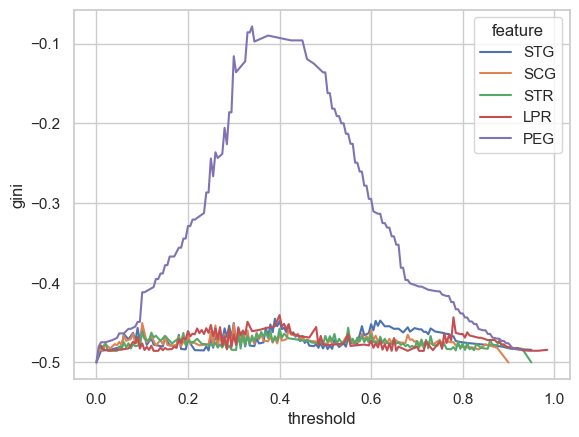

In [36]:
thr_gns = pd.DataFrame(columns=['feature', 'threshold', 'gini'])

for column in X.columns:

    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector=X[column].to_numpy() ,target_vector=y.to_numpy())

    temp = pd.DataFrame({
        'feature': [column] * thresholds.size, 
        'threshold': thresholds,
        'gini': ginis
    })
    
    thr_gns = pd.concat([thr_gns, temp], ignore_index=True)

sns.lineplot(data=thr_gns, x='threshold', y='gini', hue='feature')

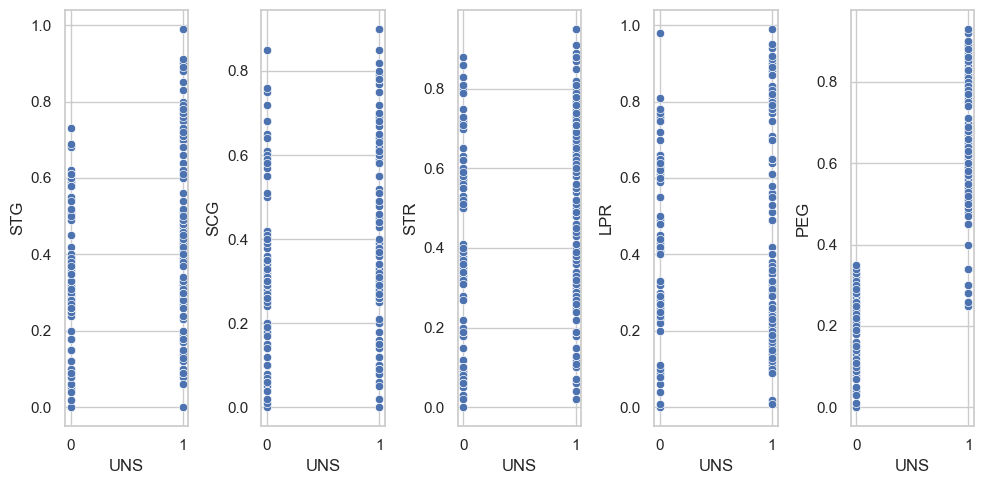

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))

for i, column in enumerate(X.columns):

    sns.scatterplot(y=X[column], x=y, ax=ax[i], )

plt.tight_layout()
plt.show()


__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Выборку стоит разделить по признаку UNS, этот выбор совпадает с визуальной оценкой scatter-графиков. Если я не запутался в формулах, то кривые для хороших графиков должны сильнее тянуться к нулю. Кривые для плохих признаков по сравнению с кривыми для хороших лежат внизу и незначительно колеблются не имея такого ярковыраженного пика.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




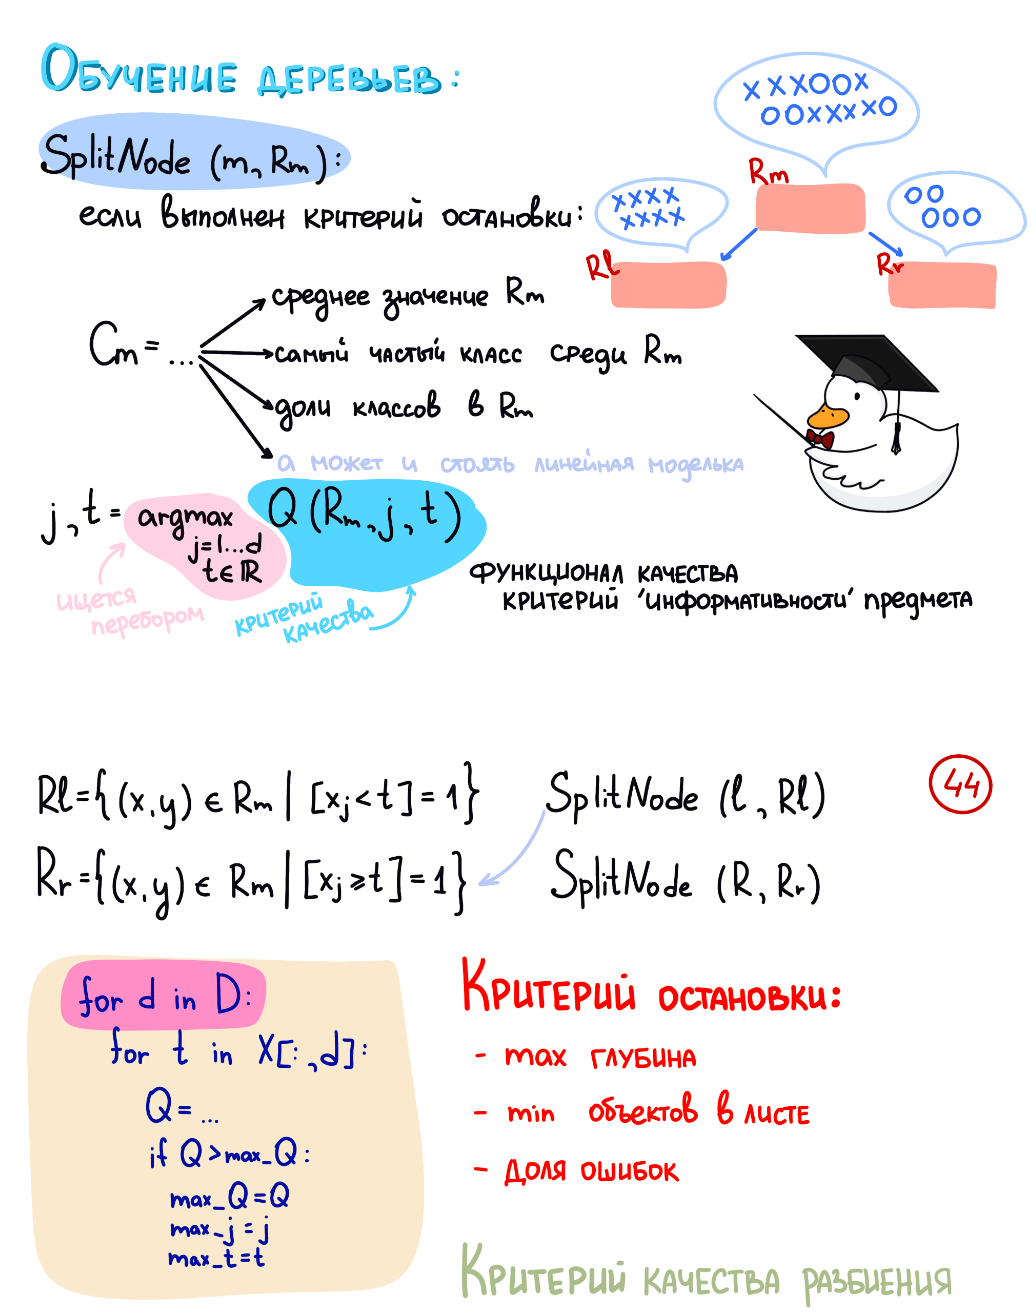

In [41]:
from tree_code import DecisionTree

tree = DecisionTree(feature_types=['categorical'] * 2)

target = np.array([0, 0, 0, 1, 1, 1])
feature = np.array([[0, 0], [1, 0], [0, 0], [1, 1], [0, 1], [1, 1]])

tree.fit(feature, target)

In [42]:
print(tree.predict(np.array([[0, 1], [1, 1], [1, 0]])))

[1 1 0]


__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [44]:
attributes_dict = {
    "classes": {"e": "edible", "p": "poisonous"},
    "cap-shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"},
    "cap-surface": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "cap-color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "bruises?": {"t": "bruises", "f": "no"},
    "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"},
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"},
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
    "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
    "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},
    "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}
}

In [226]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('agaricus-lepiota.data', header=None)

# Преобразуем данные с использованием словаря
mushrooms = data.copy()
for col_idx, attr_name in enumerate(attributes_dict.keys()):
    mapping = attributes_dict[attr_name]
    mushrooms[col_idx] = mushrooms[col_idx].map(mapping)

# Переименуем столбцы
mushrooms.columns = list(attributes_dict.keys())

# Выводим результат
mushrooms.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [85]:
from tree_code import DecisionTree
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


X = OrdinalEncoder(dtype=np.int32).fit_transform(mushrooms.iloc[:, 1:]) # Мне показалось что с помощью OrdinalEncoder получается удобнее
y = LabelEncoder().fit_transform(mushrooms.iloc[:, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=777)
 
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
tree.fit(X_train, y_train)


In [88]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=tree.predict(X_test))

1.0

__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [108]:
metrics = pd.DataFrame(columns=["categorical", "real", "real + OHE", "skleanr"])

In [120]:
from tree_code import DecisionTree
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer


df = mushrooms.copy()

y = LabelEncoder().fit_transform(df.iloc[:, 0])

#1. DecisionTree, обрабатывающий все признаки как вещественные.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, 1:])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy1 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10, error_score='raise')

#2. DecisionTree, обрабатывающий все признаки как категориальные.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, 1:])
tree = DecisionTree(feature_types=["real"] * X.shape[1])
accuracy2 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#3. DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
columns = df.columns[1:]

column_transformer = ColumnTransformer([
    ('OE', OrdinalEncoder(dtype=np.int32), columns),
    ('OHE', OneHotEncoder(sparse_output=False), columns)
])

X = column_transformer.fit_transform(df.iloc[:, 1:])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy3 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#4. DecisionTreeClassifier из `sklearn`.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, 1:])
tree = DecisionTreeClassifier()
accuracy4 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

metrics.loc['mushrooms'] = [np.mean(accuracy1), np.mean(accuracy2), np.mean(accuracy3), np.mean(accuracy4)]


In [148]:
df = pd.read_csv('tic-tac-toe-endgame.csv')


y = LabelEncoder().fit_transform(df.iloc[:, -1])

#1. DecisionTree, обрабатывающий все признаки как вещественные.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy1 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10, error_score='raise')

#2. DecisionTree, обрабатывающий все признаки как категориальные.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=["real"] * X.shape[1])
accuracy2 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#3. DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
columns = df.columns[:-1]

column_transformer = ColumnTransformer([
    ('OE', OrdinalEncoder(dtype=np.int32), columns),
    ('OHE', OneHotEncoder(sparse_output=False), columns)
])

X = column_transformer.fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy3 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#4. DecisionTreeClassifier из `sklearn`.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTreeClassifier()
accuracy4 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

metrics.loc['tic-tac-toe-endgame'] = [np.mean(accuracy1), np.mean(accuracy2), np.mean(accuracy3), np.mean(accuracy4)]

In [149]:
df = pd.read_csv('cars/car.data')

y = df.iloc[:, -1].replace({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}).to_numpy()

X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy1 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#2. DecisionTree, обрабатывающий все признаки как категориальные.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=["real"] * X.shape[1])
accuracy2 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#3. DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
columns = df.columns[:-1]

column_transformer = ColumnTransformer([
    ('OE', OrdinalEncoder(dtype=np.int32), columns),
    ('OHE', OneHotEncoder(sparse_output=False), columns)
])

X = column_transformer.fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy3 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#4. DecisionTreeClassifier из `sklearn`.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTreeClassifier()
accuracy4 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

metrics.loc['cars'] = [np.mean(accuracy1), np.mean(accuracy2), np.mean(accuracy3), np.mean(accuracy4)]


In [253]:
df = pd.read_csv('nursery/nursery.data')

y = df.iloc[:, -1].replace({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}).to_numpy()

X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy1 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#2. DecisionTree, обрабатывающий все признаки как категориальные.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=["real"] * X.shape[1])
accuracy2 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#3. DecisionTree, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
columns = df.columns[:-1]

column_transformer = ColumnTransformer([
    ('OE', OrdinalEncoder(dtype=np.int32), columns),
    ('OHE', OneHotEncoder(sparse_output=False), columns)
])

X = column_transformer.fit_transform(df.iloc[:, :-1])
tree = DecisionTree(feature_types=['categorical'] * X.shape[1])
accuracy3 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

#4. DecisionTreeClassifier из `sklearn`.
X = OrdinalEncoder(dtype=np.int32).fit_transform(df.iloc[:, :-1])
tree = DecisionTreeClassifier()
accuracy4 = cross_val_score(estimator=tree, X=X, y=y, scoring='accuracy', cv=10)

metrics.loc['nursery'] = [np.mean(accuracy1), np.mean(accuracy2), np.mean(accuracy3), np.mean(accuracy4)]

In [254]:
metrics

,categorical,real,real + OHE,skleanr
mushrooms,0.963586,0.518957,0.963586,0.965556
tic-tac-toe-endgame,0.694211,0.779682,0.694211,0.790439
cars,0.934484,0.899768,0.934484,0.944952
nursery,0.999923,0.699897,0.999923,0.999846


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


**Ответ** Результаты для categorical, real + OHE и skleanr схожи во всех датасетах, отличное повеление лишь у real. Причина как мне кажется следующая: мы кодируем категориальный признак числами и начинаем рассматривать эти числа как числовой признак, однако прямой связи между ними не будет, поскольку число для категории присваивается случайно и его величина не коррелирует с вероятностью класса. Для каких то датасетов такой подход показывает совсем плохие результаты, а для каких то нет, мне кажется это связанно с различием количества категорий в признаках в разных датасетах, поскольку для меньшего числа категорий больше вероятность что случайное присвоение числа будет информативным (особенно когда категорий всего 2). Улучшить можно если мы рассортируем категории признака по частоте положительного класса и в соответствии с этим присвоим им значения от 0 до n. Это будет уже более информативно, хотя зависимость может быть не линейной. Также можно каждой категории просто присвоить частоту положительного класса. Надеюсь я ответил на вопрос. 

# Как дела?

Мне кажется я сильно перемудрил с кодом.....